# Using JupyterNB to explore collected data

This Jupyter Notebook works through a series of examples to show how you can explore, display and analyze data collected by `run_experiment.py` (and stored in `output_database.sqlite`).

It is **strongly** recommended that you view this notebook in VSCode.

## Generating some data to analyze

To *produce* data that you can analyze here, you should execute `run_experiment.py` from the command line (with suitable arguments). Note that you can learn about the arguments by running `run_experiment.py -h`

To generate a small amount of data to analyze (should take one or two minutes), try running:
`./run_experiment.py _user_experiment.py --testing`

Note that this runs a set of experiments defined by `_user_experiments.py` in `testing` mode. In `testing` mode, only a subset of the experimental trials are run, and each trial run is for a greatly reduced time. Thus, the results are essentially meaningless, but they can be generated quickly. (This `testing` mode is primarily included to allow you to quickly run through many different experiments and check that they don't experience immediate crashes, or incomplete output.)

To run a more comprehensive test (which should take approximately three hours):
`./run_experiment.py _user_experiment.py --production`

If you like, you can actually run the `testing` mode experiments directly in the following code cell.

In [1]:
## we can run the shell command for you...
import _jupyter_cmd
_jupyter_cmd.run('./run_experiment.py _user_experiment.py --testing')

.0_10.0-k2000000.txt
plot data/l3miss-u20.0_10.0-k20000000.png
plot data/l3miss-u20.0_10.0-k20000000.txt

# plot set 4
{   'filter': '',
    'name': 'cycles-u{INS_DEL_FRAC}-k{MAXKEY}.png',
    'plot_cmd_args': '--legend-include --legend-columns 3',
    'plot_style_hooks_file': '/home/t35brown/vscode_projects/setbench_new/microbench_experiments/example/_user_plot_style.py',
    'plot_type': 'bars',
    'series': 'DS_TYPENAME',
    'title': 'u={INS_DEL_FRAC} k={MAXKEY}: Cycles/op vs thread count',
    'varying_cols_list': ['INS_DEL_FRAC', 'MAXKEY'],
    'x_axis': 'TOTAL_THREADS',
    'y_axis': 'PAPI_TOT_CYC'}
plot data/cycles-u0.0_0.0-k2000000.png
plot data/cycles-u0.0_0.0-k2000000.txt
plot data/cycles-u0.0_0.0-k20000000.png
plot data/cycles-u0.0_0.0-k20000000.txt
plot data/cycles-u0.5_0.5-k2000000.png
plot data/cycles-u0.5_0.5-k2000000.txt
plot data/cycles-u0.5_0.5-k20000000.png
plot data/cycles-u0.5_0.5-k20000000.txt
plot data/cycles-u20.0_10.0-k2000000.png
plot data/cycles-u20.0_10.0-

## Loading the data into this notebook

To do this, we start by importing some tools from _jupyter_libs.py. This file contains functions that we thought would be useful for doing this kind of work. It also imports `run_experiment.py`, and **runs it** with some default arguments that cause it to simply **load** the existing sqlite database (without running any experiments, or modifying any stored data).

This default behaviour is intended to make it easy to analyze *existing* data: You can simply import `_jupyter_libs` and get to work.

## Listing available data columns

Next let's list the available data columns. We use a function `select_to_dataframe()` provided in `_jupyter_libs` to query the sqlite database to fetch the names of columns (by querying the `PRAGMA_TABLE_INFO` meta-table that sqlite provides), along with the IPython `display()` function to pretty print the output in this notebook.

In [1]:
from _jupyter_libs import *
df = select_to_dataframe('SELECT name FROM PRAGMA_TABLE_INFO("data")')
display(df)

,name
0,__id
1,INS_DEL_FRAC
2,MAXKEY
3,DS_TYPENAME
4,TOTAL_THREADS
5,total_throughput
6,PAPI_L3_TCM
7,PAPI_L2_TCM
8,PAPI_TOT_CYC
9,PAPI_TOT_INS


## Querying the DATA table

Let's try to query some columns from the DATA table. We will again use `select_to_dataframe`. We will also demonstrate the use of the WHERE clause to filter data. (If you need to brush up on your SQL, you might check out the sqlite documentation.)

In [2]:
from _jupyter_libs import *
df = select_to_dataframe('select DS_TYPENAME, TOTAL_THREADS, total_throughput from DATA where MAXKEY == 2000000 and INS_DEL_FRAC == "0.5 0.5"')
display(df)

,DS_TYPENAME,TOTAL_THREADS,total_throughput
0,brown_ext_ist_lf,1,6522550
1,brown_ext_ist_lf,190,212948100
2,brown_ext_abtree_lf,1,8307050
3,brown_ext_abtree_lf,190,448160100
4,bronson_pext_bst_occ,1,5652700
5,bronson_pext_bst_occ,190,302273670


## Plotting the data

We can easily create a plot from this data, by calling the `plot_to_axes` function provided in `_jupyter_libs`.

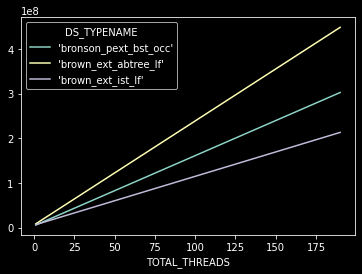

In [1]:
from _jupyter_libs import *
plot_to_axes(series='DS_TYPENAME', x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.5 0.5"')

If you prefer to provide a python dictionary containing field / value pairs instead of an explicit where clause, then use `plot_to_axes_dict`, and we will construct the WHERE clause for you.

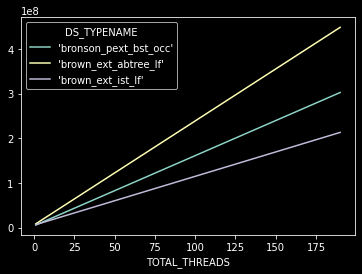

In [2]:
from _jupyter_libs import *
plot_to_axes_dict(series='DS_TYPENAME', x='TOTAL_THREADS', y='total_throughput', filter_values=dict({'MAXKEY': 2000000, 'INS_DEL_FRAC': '0.5 0.5'}))

If you'd like to **also** display the **data** being plotted, you can specify argument `display_data=True`.

,DS_TYPENAME,TOTAL_THREADS,total_throughput
0,'brown_ext_ist_lf',1,6522550
1,'brown_ext_ist_lf',190,212948100
2,'brown_ext_abtree_lf',1,8307050
3,'brown_ext_abtree_lf',190,448160100
4,'bronson_pext_bst_occ',1,5652700
5,'bronson_pext_bst_occ',190,302273670


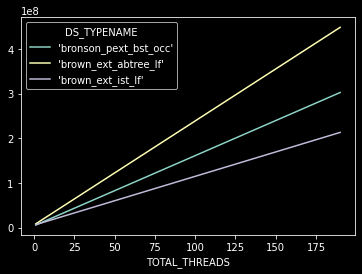

In [3]:
from _jupyter_libs import *
plot_to_axes(series='DS_TYPENAME', x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.5 0.5"', display_data=True)

## A quick sanity check

The ability to quickly display data for a plot is especially useful when you want to take a quick glance at one slice of your data as a sanity check to ensure that, for example, you aren't taking an inappropriate average over rows which differ in an important column you've forgotten to query.

You might spot such a scenario by observing that the number of rows being aggregated looks wrong, or by noticing that very different looking values are being averaged.

For example, consider the following bar plot, where we're inappropriately averaging `total_throughput` values over rows that differ in the `DS_TYPENAME` column, but we've failed to notice this, because we simply haven't included `DS_TYPENAME` in our query.

It's not too hard to see that we're averaging several `total_throughput`s that look quite different from one another, as we group by `TOTAL_THREADS`.

,TOTAL_THREADS,total_throughput
0,1,6522550
1,190,212948100
2,1,8307050
3,190,448160100
4,1,5652700
5,190,302273670


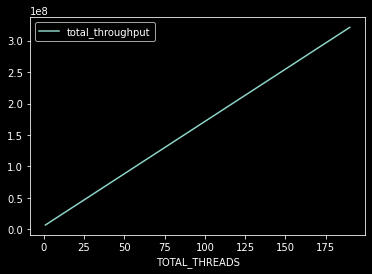

In [4]:
from _jupyter_libs import *
plot_to_axes(x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.5 0.5"', display_data=True)

To help us determine *which field we're missing* from our query, we can change our argument to `display_data='full'`.

,__id,INS_DEL_FRAC,MAXKEY,DS_TYPENAME,TOTAL_THREADS,total_throughput,PAPI_L3_TCM,PAPI_L2_TCM,PAPI_TOT_CYC,PAPI_TOT_INS,maxresident_mb,tree_stats_height,validate_result,MILLIS_TO_RUN,RECLAIM,POOL,__hostname,__file_run_data,__path_run_data,__cmd_run
0,13,0.5 0.5,2000000,brown_ext_ist_lf,1,6522550,0.021228,0.038321,492.355,556.785,2137.528,6,success,100,reclaimer_debra,pool_none,jax,data000013.txt,data/data000013.txt,LD_PRELOAD=../../../lib/libjemalloc.so timeout...
1,14,0.5 0.5,2000000,brown_ext_ist_lf,190,212948100,0.721271,6.282020,1451.220,605.916,2446.328,6,success,100,reclaimer_debra,pool_none,jax,data000014.txt,data/data000014.txt,LD_PRELOAD=../../../lib/libjemalloc.so timeout...
2,15,0.5 0.5,2000000,brown_ext_abtree_lf,1,8307050,0.013728,0.018818,402.517,416.784,2135.336,5,success,100,reclaimer_debra,pool_none,jax,data000015.txt,data/data000015.txt,LD_PRELOAD=../../../lib/libjemalloc.so timeout...
3,16,0.5 0.5,2000000,brown_ext_abtree_lf,190,448160100,0.235226,3.862130,952.987,462.870,2162.112,7,success,100,reclaimer_debra,pool_none,jax,data000016.txt,data/data000016.txt,LD_PRELOAD=../../../lib/libjemalloc.so timeout...
4,17,0.5 0.5,2000000,bronson_pext_bst_occ,1,5652700,0.013924,0.020896,552.413,865.619,2132.216,15,success,100,reclaimer_debra,pool_none,jax,data000017.txt,data/data000017.txt,LD_PRELOAD=../../../lib/libjemalloc.so timeout...
5,18,0.5 0.5,2000000,bronson_pext_bst_occ,190,302273670,0.171640,5.947460,1423.240,1171.260,2160.688,22,success,100,reclaimer_debra,pool_none,jax,data000018.txt,data/data000018.txt,LD_PRELOAD=../../../lib/libjemalloc.so timeout...


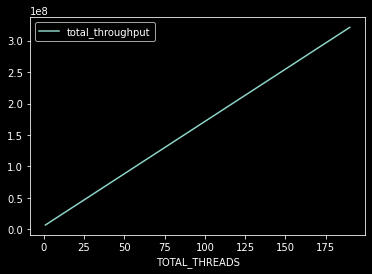

In [2]:
from _jupyter_libs import *
plot_to_axes(x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.5 0.5"', display_data='full')

In fact, to make it even easier to tell which field we've neglected, you can change the argument to `display_data='diff'`. This only displays columns that:
- are not prefixed with '__'
  (as those are added by `run_experiment.py` rather than the user)
- do not contain identical data in all rows

,DS_TYPENAME,TOTAL_THREADS,total_throughput,PAPI_L3_TCM,PAPI_L2_TCM,PAPI_TOT_CYC,PAPI_TOT_INS,maxresident_mb,tree_stats_height
0,brown_ext_ist_lf,1,6522550,0.021228,0.038321,492.355,556.785,2137.528,6
1,brown_ext_ist_lf,190,212948100,0.721271,6.282020,1451.220,605.916,2446.328,6
2,brown_ext_abtree_lf,1,8307050,0.013728,0.018818,402.517,416.784,2135.336,5
3,brown_ext_abtree_lf,190,448160100,0.235226,3.862130,952.987,462.870,2162.112,7
4,bronson_pext_bst_occ,1,5652700,0.013924,0.020896,552.413,865.619,2132.216,15
5,bronson_pext_bst_occ,190,302273670,0.171640,5.947460,1423.240,1171.260,2160.688,22


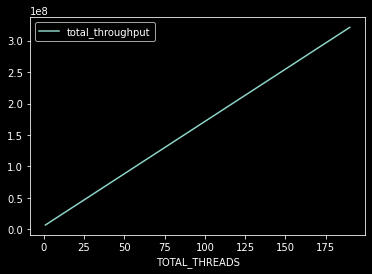

In [1]:
from _jupyter_libs import *
plot_to_axes(x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.5 0.5"', display_data='diff')

## We can filter the returned data more aggressively
Just specify `display_data='diff2'`. In addition to the filtering in `'diff'` mode, this displays only the *subset* of columns in `'diff'` that were specified by the user via `add_run_param()` in `_user_experiment.py`, and also only displays fields that we haven't included in our plot. That is, we only display columns that:

- are not already in our plot
- were explicitly added as a varying experimental parameter using `add_run_param()`
- are not prefixed with '__'
- do not contain identical data in all rows

As we can see in the example below, `display_data='diff2'` immediately highlights the column we forgot.

,DS_TYPENAME
0,brown_ext_ist_lf
1,brown_ext_ist_lf
2,brown_ext_abtree_lf
3,brown_ext_abtree_lf
4,bronson_pext_bst_occ
5,bronson_pext_bst_occ


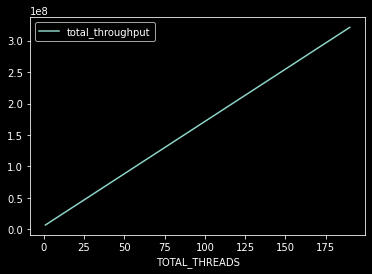

In [4]:
from _jupyter_libs import *
plot_to_axes(x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.5 0.5"', display_data='diff2')

If we add `DS_TYPENAME` to the plot as our `series` field, and rerun with `display_data='diff2'`, we can see that the filtered `diff2` data frame is completely empty!

This is the expected result when using `diff2` and aggregating row values appropriately.

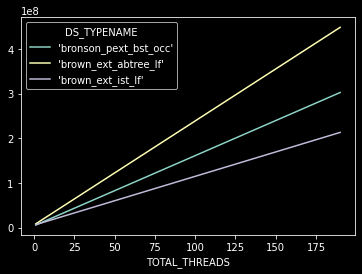

In [1]:
from _jupyter_libs import *
plot_to_axes(series='DS_TYPENAME', x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.5 0.5"', display_data='diff2')

## Manually placing multiple plots in a grid

The function `plot_to_axes` takes a matplotlib/pandas/seaborn `axes` object as an optional argument called `ax`. This allows us to easily render plots in columns/rows of a grid.

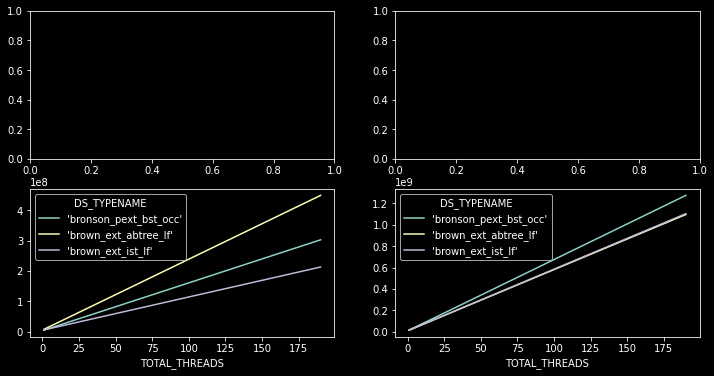

In [7]:
from _jupyter_libs import *
## create a 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(12, 6))
## fill in the bottom left grid cell
plot_to_axes(ax=axes[1,0], series='DS_TYPENAME', x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.5 0.5"')
## fill in the bottom right grid cell
plot_to_axes(ax=axes[1,1], series='DS_TYPENAME', x='TOTAL_THREADS', y='total_throughput', where='WHERE MAXKEY == 2000000 AND INS_DEL_FRAC == "0.0 0.0"')

## Automatically producing plots to fill a grid

Tools like the `Seaborn` library's `factorplot` make it easy to plot **5-dimensional data** as *rows* and *columns* of plots, each containing *series*, *x* and *y* dimensions.

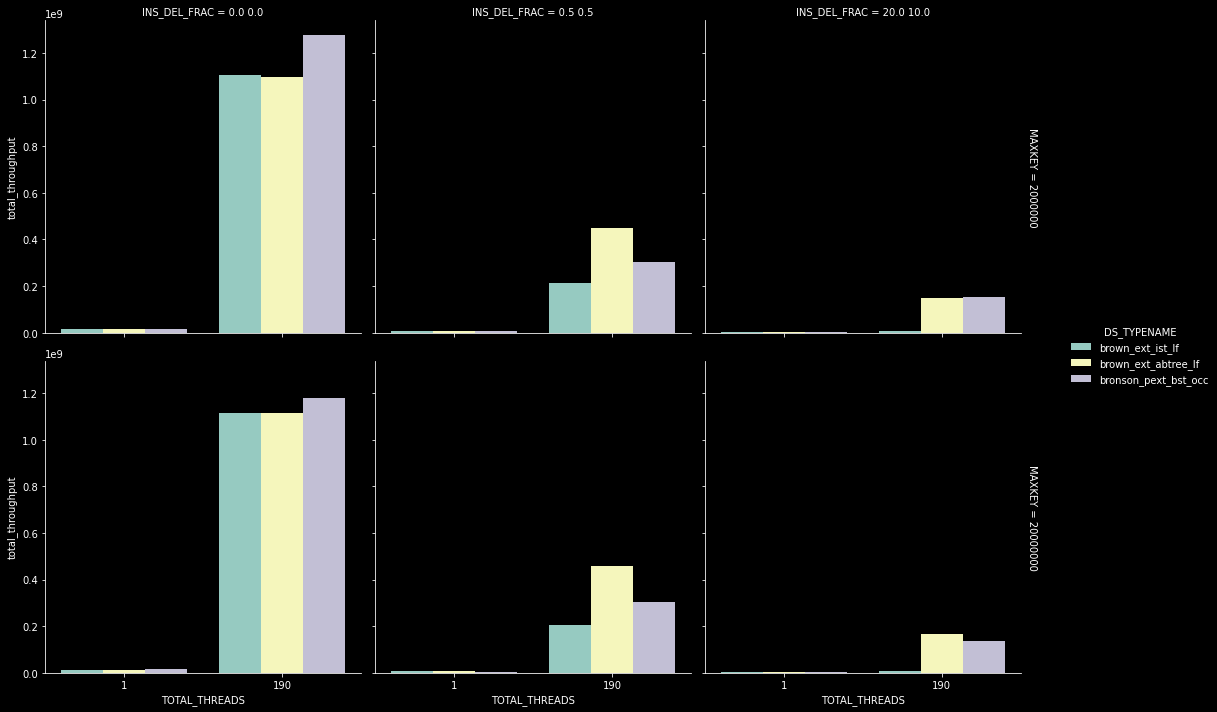

In [3]:
from _jupyter_libs import *
df = select_to_dataframe('SELECT MAXKEY, INS_DEL_FRAC, DS_TYPENAME, TOTAL_THREADS, total_throughput FROM DATA')
g = sns.factorplot(kind='bar', data=df, col='INS_DEL_FRAC', row='MAXKEY', hue='DS_TYPENAME', x='TOTAL_THREADS', y='total_throughput', margin_titles=True)

## Using FacetGrid for more control

You can produce the same sort of plot using Seaborn's `FacetGrid` function. `FacetGrid` creates a grid of plots backed by a dataframe.

You specify `col` and `row` fields, and it will filter the appropriately for each cell in the grid, and make it available to you.

However, unlike `factorplot`, `FacetGrid` does not plot the data for you. Instead, you have to use the `map` function to specify how the data in each grid cell should be plotted. This gives you more control over the end result. (For example, although we don't demonstrate this here, you could use different plot styles in different grid cells.)

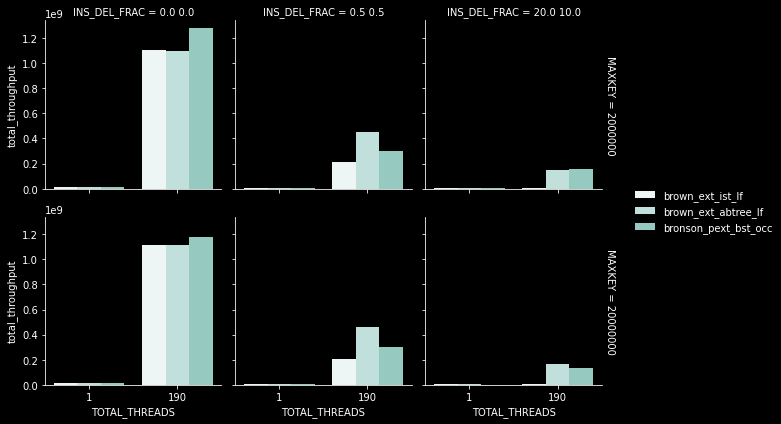

In [13]:
from _jupyter_libs import *
df = select_to_dataframe('SELECT MAXKEY, INS_DEL_FRAC, DS_TYPENAME, TOTAL_THREADS, total_throughput FROM DATA')
g = sns.FacetGrid(data=df, col='INS_DEL_FRAC', row='MAXKEY', margin_titles=True)
g.map(sns.barplot, 'TOTAL_THREADS', 'total_throughput', 'DS_TYPENAME')
g.add_legend()

## Customizing a FacetGrid: changing the legend and resizing the figure

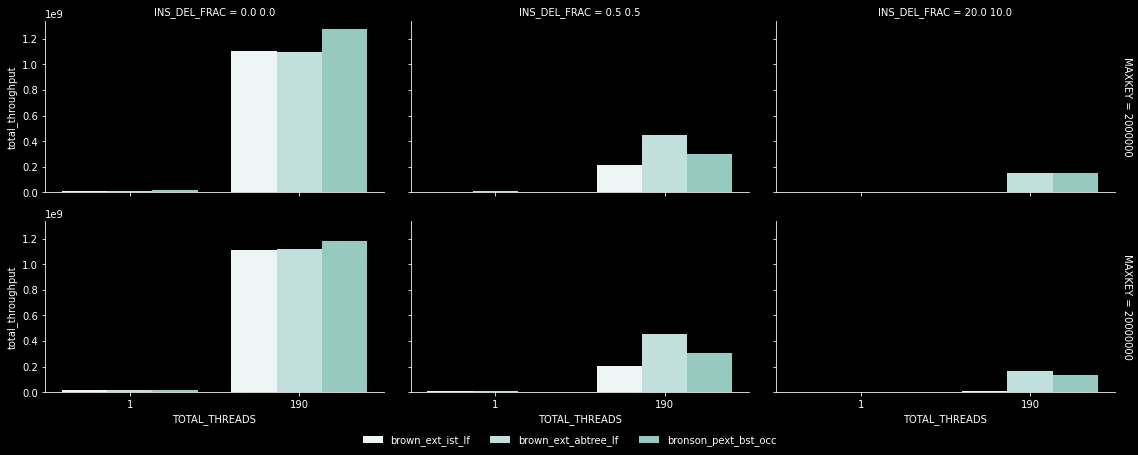

In [14]:
from _jupyter_libs import *
df = select_to_dataframe('SELECT MAXKEY, INS_DEL_FRAC, DS_TYPENAME, TOTAL_THREADS, total_throughput FROM DATA')
g = sns.FacetGrid(data=df, col='INS_DEL_FRAC', row='MAXKEY', margin_titles=True)
g.map(sns.barplot, 'TOTAL_THREADS', 'total_throughput', 'DS_TYPENAME')

## five-column legend at the bottom
g.add_legend(loc='lower center', ncol=5)
## shift the bottom of the plots upwards (by 14% of the figure)
## to avoid text axis title text overlapping the legend
g.fig.subplots_adjust(bottom=0.14, top=1, left=0, right=1)

Of course, the bottom legend leaves us with less vertical space to see our plots. We can set our figure size manually to correct the size/shape as we desire.

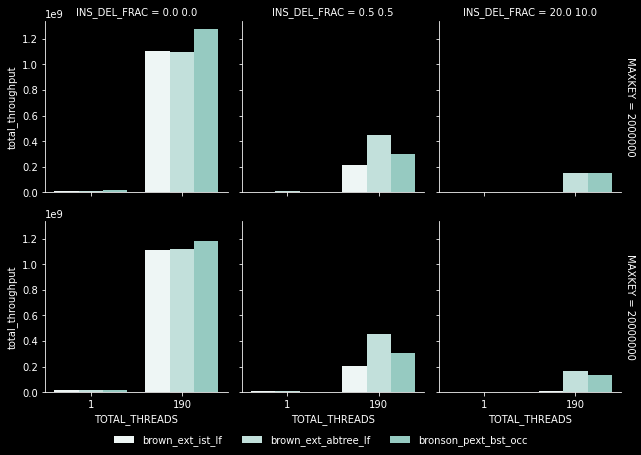

In [34]:
from _jupyter_libs import *
df = select_to_dataframe('SELECT MAXKEY, INS_DEL_FRAC, DS_TYPENAME, TOTAL_THREADS, total_throughput FROM DATA')
g = sns.FacetGrid(data=df, col='INS_DEL_FRAC', row='MAXKEY', margin_titles=True)
g.map(sns.barplot, 'TOTAL_THREADS', 'total_throughput', 'DS_TYPENAME')

g.add_legend(loc='lower center', ncol=5)
g.fig.subplots_adjust(bottom=0.14, top=1, left=0, right=1)

## set the figure to a desired size
g.fig.set_size_inches(8, 6)

## Heavily customizing the style of a FacetGrid

Here, we define a style for each series, by constructing explicit maps from series values to marker types, colors, line dashing styles, and line sizes. Then we feed this carefully to `sns.lineplot()` by running the `FacetGrid` `map()` function on our own intermediate function called `plot_facet()`.

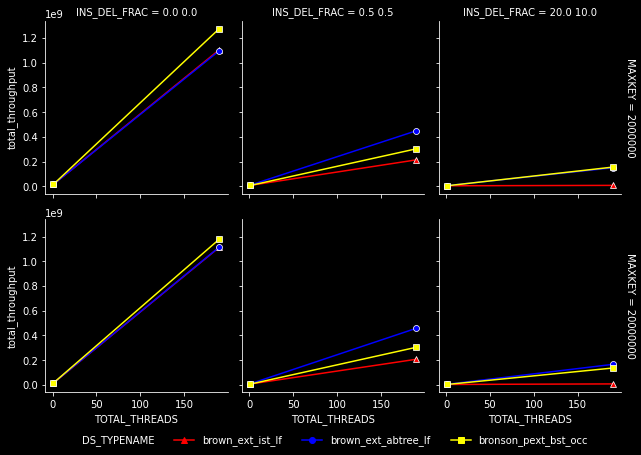

In [141]:
from _jupyter_libs import *
df = select_to_dataframe('SELECT MAXKEY, INS_DEL_FRAC, DS_TYPENAME, TOTAL_THREADS, total_throughput FROM DATA')

## define lists of values that will consume for each series,
## wrapping around to the beginning of each list if we run out of elements.
markers = [ '^', 'o', 's', '+', 'x', 'v', '*', 'X', '|', '.', 'd' ]
palette = [ 'red', 'blue', 'yellow', 'green' ]
dashes = [ '' ]
sizes = [ 1 ]

## construct mappings from each series value to round-robin choices from the above
plot_style_kwargs = dict(markers=dict(), palette=dict(), sizes=dict(), dashes=dict())
distinct_series = select_distinct_field('DS_TYPENAME')
for i, series in zip(range(len(distinct_series)), distinct_series):
    plot_style_kwargs['markers'][series] = markers[i % len(markers)]
    plot_style_kwargs['palette'][series] = palette[i % len(palette)]
    plot_style_kwargs['sizes'][series] = sizes[i % len(sizes)]
    plot_style_kwargs['dashes'][series] = dashes[i % len(dashes)]

## feed those mappings into seaborn lineplot via our own plot_facet function
def plot_facet(x, y, series, **kwargs):
    sns.lineplot(x=x, y=y, hue=series, style=series, **plot_style_kwargs, **kwargs)

## pair our own plot_facet function with map()
g = sns.FacetGrid(data=df, col='INS_DEL_FRAC', row='MAXKEY', margin_titles=True)
g.map(plot_facet, 'TOTAL_THREADS', 'total_throughput', 'DS_TYPENAME')

## customize legend and overall figure size
g.add_legend(loc='lower center', ncol=5)
g.fig.subplots_adjust(bottom=0.14, top=1, left=0, right=1)
g.fig.set_size_inches(8, 6)